In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "pictures/"
CATEGORIES = ["Bishop", "Knight", "Pawn", "Queen", "Rook"]

In [15]:
def create_data():
    training_data = []
    for category in CATEGORIES:
        path = DATADIR + category
        category_index = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(path + '/' + img, cv2.IMREAD_GRAYSCALE)
            img_resized = cv2.resize(img_array, (128, 128))
            training_data.append([img_resized, category_index])
    return training_data

In [16]:
training_data = create_data()

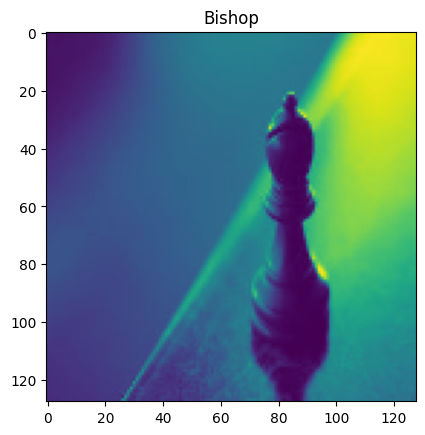

In [4]:
index_test = 48
plt.imshow(training_data[index_test][0])
plt.title(CATEGORIES[training_data[index_test][1]])
plt.show()

In [17]:
import random

# to mix the data
random.shuffle(training_data)

In [18]:
X = [] # the X_training
Y = [] # the Y_training

In [19]:
for pixels, category in training_data:
    X.append(pixels)
    Y.append(category)

In [20]:
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(651, 128, 128)
(651,)


In [21]:
import tensorflow as tf
X = tf.keras.utils.normalize(X, axis = 1)

In [22]:
split_size = int(0.8 * X.shape[0])

X_train = X[:split_size, :]
X_test = X[split_size:, :]

Y_train = Y[:split_size]
Y_test = Y[split_size:]

In [33]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(len(CATEGORIES), activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9110 - loss: 0.2656
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9790 - loss: 0.0956
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9622 - loss: 0.1384
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9652 - loss: 0.1032
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9023 - loss: 0.2401
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8617 - loss: 0.2894
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9460 - loss: 0.1742
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9770 - loss: 0.0913
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9873 - loss: 0.0683
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9679 - loss: 0.1066
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9724 - loss: 0.0882
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy:

In [55]:
val_acc, val_loss = model.evaluate(X_train, Y_train)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9779 - loss: 0.0694


In [56]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


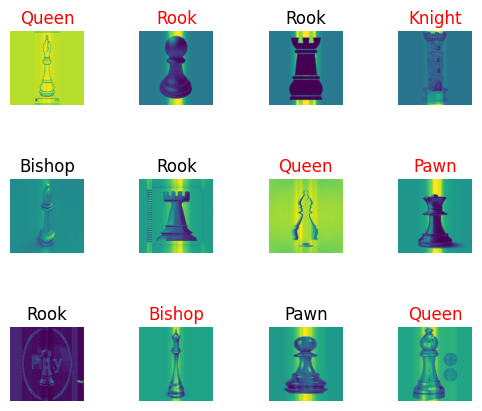

0.5833333333333334 false values


In [58]:
x = 11
y = x+12
# printing some pictures of the x_test and it's predictions as title
false_values = 0
for i in range(x, y):
    plt.subplot(3, 4, i-x+1)
    plt.subplots_adjust(hspace=1)
    plt.imshow(X_test[i])
    plt.axis('off')
    color = 'black'
    if np.argmax(predictions[i]) != Y_test[i]:
        false_values = false_values + 1
        color = 'red'
    plt.title(CATEGORIES[np.argmax(predictions[i])], color=color)
plt.show()

print(false_values/12,'false values')